# Aprendizado Supervisionado e K Vizinhos mais Próximos

## Introdução

Nós utilizaremos a base de dados de taxa de rejeição da indústria de telecomunicações para essa lista de exercícios. A base de dados tem o nome `Orange_Telecom_Churn_Data.csv`. Nesse notebook carregaremos a base de dados, faremos algum pré-processamento e usaremos a técnica k-NN para predizer a taxa de rejeição baseado nas características mensuradas.

## Exercício 1

* Comece importando os dados através do pandas. Examine as colunas e os dados
* Note que os dados contêm estado, código de área e telefone. Você acha que esses atributos são interessantes para construir nosso modelo de classificação? Por que?

Não utilizaremos esses atributos para essa base, então eles podem ser removidos do dataframe (método `drop`).

In [1]:
import pandas as pd

arquivo = 'data/Orange_Telecom_Churn_Data.csv'
df = pd.read_csv(arquivo)
df = df.drop(['state', 'area_code', 'phone_number'], axis = 1)
df[:10]


,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,118,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,147,yes,no,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,117,no,no,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,141,yes,yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


## Exercício 2

* Note que algumas das colunas são categóricas e algumas são *float*. Esses atributos precisam ser numéricos para usar os algoritmos que aprenderemos no curso.
* Finalmente, o algoritmo K-Vizinhos mais próximos necessita de dados escalonados. Escalone os dados utilizando um dos métodos aprendidos em aula.

In [2]:
import warnings
warnings.filterwarnings('ignore', module = 'sklearn')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer

bin_cols = ['intl_plan', 'voice_mail_plan', 'churned']
 
lb = LabelBinarizer()
scaler = MinMaxScaler()

for column in bin_cols:
    #df[column] = df[column].map(lambda input_str: 1 if input_str == 'yes' or input_str == 'True' else 0)
    df[column] = lb.fit_transform(df[column])

df[df.columns] = scaler.fit_transform(df)

df[:10]

,account_length,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.524793,0.0,1.0,0.480769,0.754196,0.666667,0.754183,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111,0.0
1,0.438017,0.0,1.0,0.500000,0.459744,0.745455,0.459672,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111,0.0
2,0.561983,0.0,0.0,0.000000,0.692461,0.690909,0.692436,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000,0.0
3,0.342975,1.0,0.0,0.000000,0.851778,0.430303,0.851740,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222,0.0
4,0.305785,1.0,0.0,0.000000,0.474253,0.684848,0.474230,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333,0.0
5,0.483471,1.0,0.0,0.000000,0.635562,0.593939,0.635542,0.606544,0.594118,0.606600,0.516203,0.674286,0.516601,0.315,0.30,0.314815,0.000000,0.0
6,0.495868,0.0,1.0,0.461538,0.620768,0.533333,0.620649,0.958207,0.635294,0.958266,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333,0.0
7,0.603306,1.0,0.0,0.000000,0.446657,0.478788,0.446620,0.283475,0.552941,0.283403,0.536203,0.548571,0.536297,0.355,0.30,0.355556,0.000000,0.0
8,0.479339,0.0,0.0,0.000000,0.524893,0.587879,0.524933,0.966731,0.470588,0.967001,0.546329,0.514286,0.546427,0.435,0.20,0.435185,0.111111,0.0
9,0.578512,1.0,1.0,0.711538,0.735704,0.509091,0.735609,0.610393,0.652941,0.610482,0.826329,0.554286,0.826674,0.560,0.25,0.559259,0.000000,0.0


## Exercício 3

* Separe as colunas de atributos (todas menos `churned`) da  coluna de rótulo (`churned`). Isso criará duas tabelas.
* Aplique o método `.fit()` do K-nearest neighbors com um valor de `n_neighbors=3` para essa base de dados e verifique o resultado com o método `.predict()` na mesma base.

In [3]:
x_cols = [x for x in df.columns if x != 'churned']

X_data = df[x_cols]
y_data = df['churned']

In [4]:
from sklearn.neighbors import KNeighborsClassifier

kNN_classifier = KNeighborsClassifier(n_neighbors = 3)
kNN_classifier.fit(X_data, y_data)
predicted_dataset = kNN_classifier.predict(X_data)

## Exercício 4

Ainda não ensinamos formas de medir o erro, mas a acurácia é um conceito simples de entender--é a porcentagem de rótulos que foram corretamente classificados:

$acc = \frac{corretos}{total}$

* Escreva uma função para calcular a acurácia usando os rótulos verdadeiros e os preditos.
* Usando a função, calcule a acurácia do K-nn nos dados.

In [5]:
from functools import reduce
def accuracy(real, predict):
    return "datasets do not have the same length." if len(real) != len(predict) else reduce(lambda x, y: x + y, map(lambda tup: 1 if tup[0] == tup[1] else 0, zip(y_data, predict))) / len(real)

accuracy(y_data, predicted_dataset)

0.9422

## Exercício 5

* Repita a aplicação do modelo K-nearest neighbors mas com o parâmetro `weights=distance`. Calcule a acurácia da função criada por você.
* Repita a aplicação do modelo com `n_neighbors=3`, `weights=uniform` e `p=1` para utilizar a distância de Manhattan. Verifique os resultados.

Quando as distâncias ponderadas são utilizadas para a parte 1 dessa questão, vocês obterão acurácia de 1.0. Por que isso ocorre? *Dica:* o KNN usa diretamente os dados para fazer a predição.

In [6]:
kNN_inverse_distance_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')
kNN_inverse_distance_classifier.fit(X_data, y_data)
predicted_dataset_by_inverse_distance = kNN_inverse_distance_classifier.predict(X_data)

print(f"Acurácia da predição pelo inverso da distância: {accuracy(y_data, predicted_dataset_by_inverse_distance)}")

kNN_manhattan_classifier = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', p = 1)
kNN_manhattan_classifier.fit(X_data, y_data)
predicted_dataset_by_manhattan_distance = kNN_manhattan_classifier.predict(X_data)

print(f"Acurácia da predição pela distância de Manhattan: {accuracy(y_data, predicted_dataset_by_manhattan_distance)}")

Acurácia da predição pelo inverso da distância: 1.0
Acurácia da predição pela distância de Manhattan: 0.9456


## Exercício 6

* Teste o modelo KNN utilizando valores de `n_neighbors` na faixa de 1 a 20. Deixe o restante dos parâmetros como o padrão. Armazene os valores de vizinhos e acurácia em uma lista no formato [(k, acuracia)].
* Plote um gráfico do tipo *scatter* da acurácia vs vizinhos. O que acontece com `n_neighbors=1`? Por que isso ocorre?

In [7]:
score_list = list()

'''escreva no bloco abaixo'''
for k in range (1, 21):
    kNN_classifier = KNeighborsClassifier(n_neighbors = k)
    kNN_classifier.fit(X_data, y_data)
    predicted_dataset = kNN_classifier.predict(X_data)
    score_list.append((k, accuracy(y_data, predicted_dataset)))
'''fim do código'''

score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])
score_df

,k,accuracy
0,1,1.0000
1,2,0.9292
2,3,0.9422
3,4,0.9154
4,5,0.9284
5,6,0.9156
6,7,0.9254
7,8,0.9122
8,9,0.9224
9,10,0.9092


In [8]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

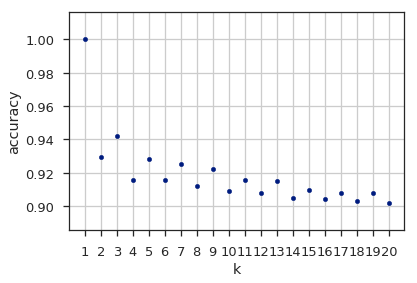

In [9]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.plot(x = 'k', y = 'accuracy', kind = 'scatter', grid = True)

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));